# Movie Industry EDA

## Objective: Investigate the film industry to gain sufficient understanding of what attributes to success and in turn utilize this analysis to create actionable recommendations for industry entry.

### Let's import libraries we may need for our analysis and import the dataframes.

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from scipy.stats import pearsonr
%matplotlib inline

In [25]:
movie_dates_df = pd.read_csv('movie_release_dates.csv', index_col=0)
theaters_df = pd.read_csv('movie_theater_data.csv', index_col=0)
awards_df = pd.read_csv('movie_awards.csv', index_col=0)
actors_df = pd.read_csv('Actors_Table.csv')
directors_df = pd.read_csv('Directors_Table.csv')
imdb_base_df = pd.read_csv('IMDb_base.csv')
imdb_budgets_df = pd.read_csv('IMDb_budgets.csv')
studio_df = pd.read_csv('studiodf.csv')

In [26]:
#First remove any movies that had a $0 domestic gross.
imdb_budgets_df = imdb_budgets_df[imdb_budgets_df['Domestic Gross'] !=0]

Now that we've fized that, let's preview the head of each dataframe so we know what data we are working with.

In [27]:
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564
1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337
2,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376
3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754
4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395


In [28]:
movie_dates_df.head()

,movie,release_date,release_month,release_day,release_year
0,Metropolis,1927-03-06,March,Sunday,1927
1,"Dr. Mabuse, the Gambler",1927-08-08,August,Monday,1927
2,The Unknown,1927-06-03,June,Friday,1927
3,The Jazz Singer,1927-10-06,October,Thursday,1927
4,Chicago,1927-12-23,December,Friday,1927


In [29]:
theaters_df.head()

,title,max_theaters,year,total_dom_gross($),studio
0,The Lion King,4802,2019,543638043,Disney
1,Avengers: Endgame,4662,2019,858373000,Disney
2,Spider-Man: Far from Home,4634,2019,390532085,Sony
3,Toy Story 4,4575,2019,434038008,Disney
4,It Chapter Two,4570,2019,211593228,Warner Bros.


In [30]:
actors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Robert Downey Jr.,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Chris Evans,"Apr 23, 2019",400000000,858373000,2797800564
2,Avengers: Endgame,2019,Mark Ruffalo,"Apr 23, 2019",400000000,858373000,2797800564
3,Avengers: Endgame,2019,Chris Hemsworth,"Apr 23, 2019",400000000,858373000,2797800564
4,Avatar,2009,Sam Worthington,"Dec 17, 2009",237000000,760507625,2788701337


In [31]:
directors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Joe Russo,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Anthony Russo,"Apr 23, 2019",400000000,858373000,2797800564
2,Avatar,2009,James Cameron,"Dec 17, 2009",237000000,760507625,2788701337
3,Black Panther,2018,Ryan Coogler,"Feb 13, 2018",200000000,700059566,1346103376
4,Avengers: Infinity War,2018,Joe Russo,"Apr 25, 2018",300000000,678815482,2048359754


In [32]:
imdb_base_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre
0,Star Wars: Episode VII - The Force Awakens,2015,7.9,PG-13,138,"Action, Adventure, Sci-Fi"
1,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama"
2,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy"
3,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi"
4,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi"


In [33]:
studio_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,Buena Vista,415000000.0,652000000,2010
1,Alice in Wonderland (2010),Buena Vista,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,Pixar/Dreamworks,238700000.0,513900000,2010


# Question 1: What are the most profitable movies and how much should you spend?

Let's calculate profit and profit margin for each of the movies in `imdb_budgets_df` dataframe and add those as new columns.  

Here, we'll define profit as `Worldwide Gross`-`Production Budget`.

It will also be beneficial in our analysis to have uniformity when discussing movie budgets and profits so we will also create an adjusted budget and adjusted profit column to account for inflation.

We will use an average inflation rate of 3.22%.

In [34]:
imdb_budgets_df['Profit'] = imdb_budgets_df['Worldwide Gross'] - imdb_budgets_df['Production Budget']

imdb_budgets_df['Profit_Margin'] = (imdb_budgets_df['Worldwide Gross'] - 
                                    imdb_budgets_df['Production Budget'])/imdb_budgets_df['Worldwide Gross']

In [35]:
imdb_budgets_df['Adjusted_Budget'] = ((((2020-imdb_budgets_df['Year'])*.0322)+1)*
                                      imdb_budgets_df['Production Budget'])
imdb_budgets_df['Adjusted_Profit'] = (((2020-imdb_budgets_df['Year'])*.0322)+1)*imdb_budgets_df['Profit']
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,412880000.0,2.475010e+09
1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,320945400.0,3.455514e+09
2,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376,1146103376,0.851423,212880000.0,1.219912e+09
3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.853541,319320000.0,1.860954e+09
4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.909429,348120000.0,3.495488e+09


For this question we are specifically looking at profitable movies.  We'll create a separate dataframe called `profitable_movies_df` where the `Profit` column is greater than 0. We will then sort by `Adjusted_Profit` to rank movies in terms of profitability.

In [36]:
profitable_movies_df = imdb_budgets_df.loc[imdb_budgets_df['Profit'] > 0]
profitable_ranked_df = profitable_movies_df.sort_values(by=['Adjusted_Profit'], ascending=False)
profitable_ranked_df.reset_index(inplace=True)
profitable_ranked_df.head()

,index,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.909429,348120000.0,3.495488e+09
1,1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.915014,320945400.0,3.455514e+09
2,0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.857031,412880000.0,2.475010e+09
3,3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.853541,319320000.0,1.860954e+09
4,28,Jurassic Park,1993,8.1,PG-13,127,"Action, Adventure, Sci-Fi","Jun 11, 1993",63000000,402523348,1045627627,982627627,0.939749,117772200.0,1.836924e+09


Now that we've got our profitable movie data, let's take a look at adjusted profit versus adjusted budget for each of the movies in the dataframe.

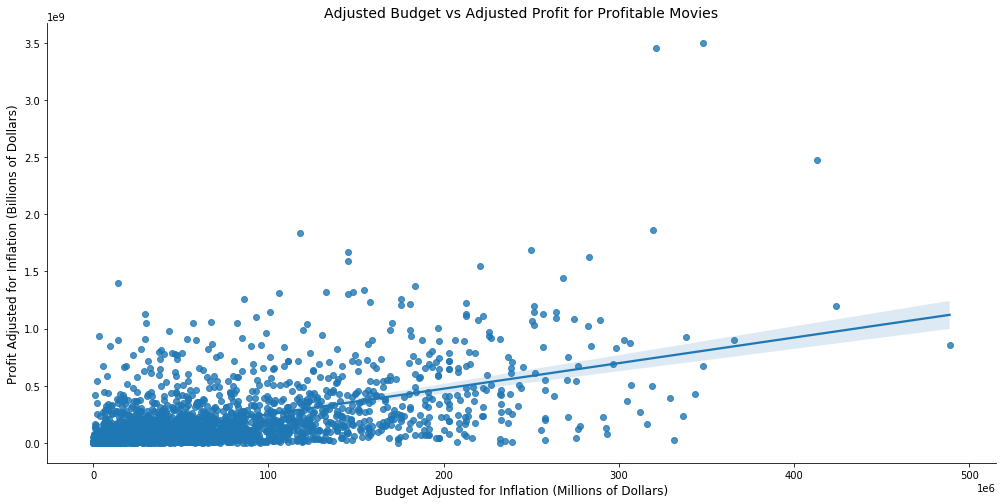

In [176]:
ax1 = sns.lmplot(x='Adjusted_Budget', y='Adjusted_Profit', data=profitable_ranked_df, height=7, aspect=2)
plt.xlabel('Budget Adjusted for Inflation (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Adjusted for Inflation (Billions of Dollars)', fontsize=12)
plt.title('Adjusted Budget vs Adjusted Profit for Profitable Movies', fontsize=14)
plt.savefig('BudgetVProfit');

This scatter plot is helpful in beginning to understand how much money should be budgeted for a movie.  The positive trend line indicates that an increase in the budget will result in an increase in profit.

Let's take a look at the most successful movies so that we can get a better idea of what the budget should be.

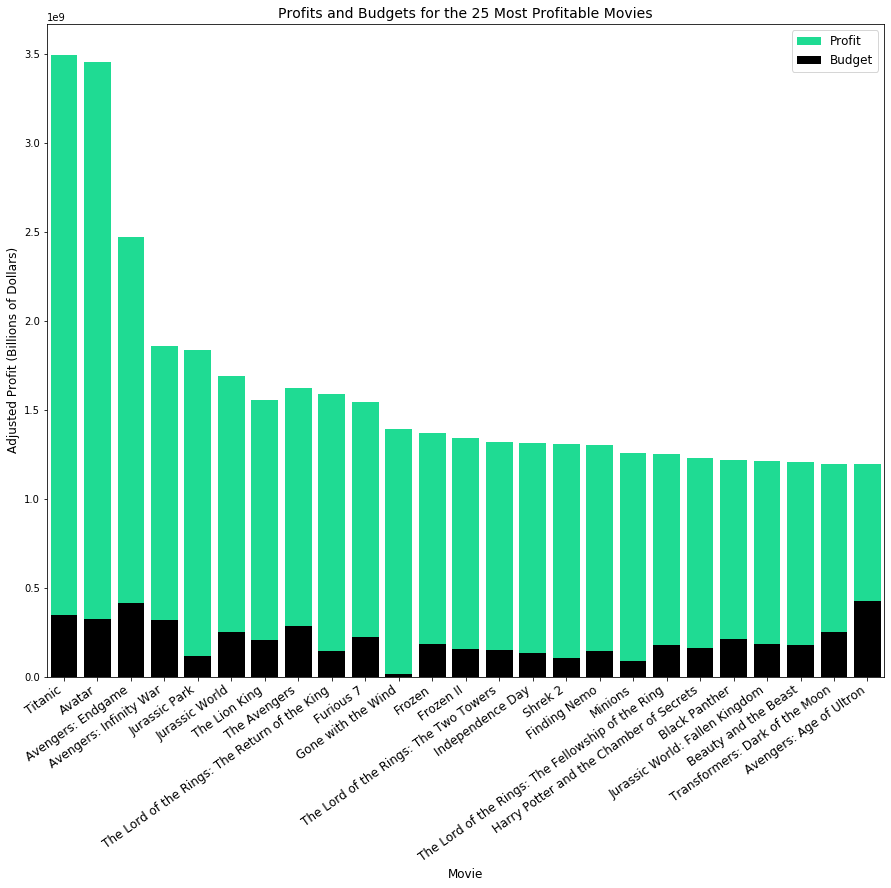

In [177]:
plt.figure(figsize=(15,12))
sns.barplot(x=profitable_ranked_df.loc[0:25, 'Movie'],y=profitable_ranked_df.loc[0:25, 'Adjusted_Profit'], 
            color='mediumspringgreen', label='Profit', ci=None)
sns.barplot(x=profitable_ranked_df.loc[0:25, 'Movie'],y=profitable_ranked_df.loc[0:25, 'Adjusted_Budget'], 
            color='black', label='Budget', ci=None)
plt.xlabel('Movie', fontsize=12)
plt.title("Profits and Budgets for the 25 Most Profitable Movies", fontsize=14)
plt.ylabel('Adjusted Profit (Billions of Dollars)', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('ProfitBudgetTop25');

In [39]:
profitable_movies_df['Adjusted_Budget'].describe()

count    2.836000e+03
mean     6.068914e+07
std      6.319946e+07
min      1.060640e+04
25%      1.660885e+07
50%      3.868410e+07
75%      8.224715e+07
max      4.888342e+08
Name: Adjusted_Budget, dtype: float64

In [40]:
profitable_movies_df.loc[0:24, 'Adjusted_Budget'].describe()

count    2.500000e+01
mean     2.427778e+08
std      8.069887e+07
min      1.060640e+08
25%      1.806350e+08
50%      2.257600e+08
75%      2.829600e+08
max      4.237650e+08
Name: Adjusted_Budget, dtype: float64

In [41]:
profitable_movies_df['Profit_Margin'].describe()

count    2836.000000
mean        0.621489
std         0.240466
min         0.000265
25%         0.465466
50%         0.671426
75%         0.809796
max         0.997599
Name: Profit_Margin, dtype: float64

In [42]:
profitable_movies_df.loc[0:24, 'Profit_Margin'].describe()

count    25.000000
mean      0.846165
std       0.046107
min       0.738557
25%       0.813675
50%       0.849688
75%       0.871288
max       0.925154
Name: Profit_Margin, dtype: float64

In [43]:
len(profitable_ranked_df.loc[profitable_ranked_df['Profit_Margin'] > 0.5])

2041

Clearly the most successful 25 movies have both incredible profits and profit margins. Titanic (1997), Avatar, and Avengers: Endgame are the most successful movies in terms of sheer profit. 

So how do we know what to spend? We need to think about what sort of profit margin we want to see. 2043 out of 2841 total profitable movies have a profit margin over 50%. That's good news as it indicates that we can be more aggressive in choosing a threshold for the profit margin. The top 25 movies have a median profit margin of 84.9% with a median budget of \\$225,760,000. When looking at all of our profitable movies, the profit margin drops significantly to 67.1\% and the budget drops significantly to \\$38,676,000. We use the median to describe our data here as the mean will be skewed by outlier data.

Let's filter the data with a profit margin of  75% or greater and a budget greater than $38,676,000.

In [44]:
filtered_df = profitable_ranked_df.loc[(profitable_ranked_df['Profit_Margin'] >= 0.75) & 
                         (profitable_ranked_df['Adjusted_Budget'] > 38676000)]
len(filtered_df)

374

After filtering we still have 374 movies left upon which to draw conclusions.

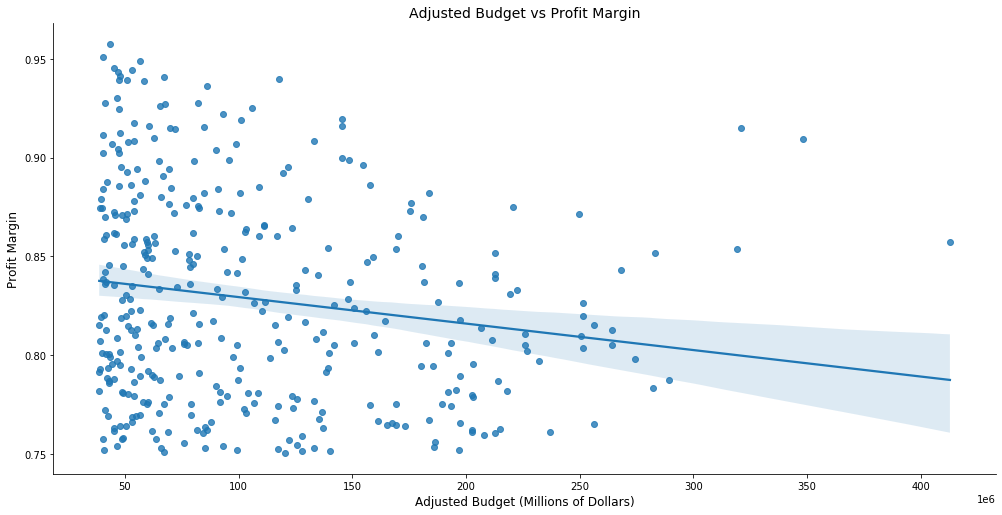

In [178]:
ax2 = sns.lmplot(x='Adjusted_Budget', y='Profit_Margin', data=filtered_df, height=7, aspect=2)
plt.xlabel('Adjusted Budget (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Adjusted Budget vs Profit Margin', fontsize=14)
plt.savefig('BudgetVMargin');

In [46]:
filtered_df.describe()

,index,Year,IMDb,Runtime,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
count,374.000000,374.000000,374.000000,374.000000,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,374.000000,3.740000e+02,3.740000e+02
mean,391.529412,2004.965241,7.012032,118.601604,7.781418e+07,1.933788e+08,4.849949e+08,4.071807e+08,0.828523,1.058585e+08,5.628791e+08
std,378.199265,10.811640,0.902894,24.020748,5.757015e+07,1.270890e+08,3.776903e+08,3.299941e+08,0.052470,6.627224e+07,4.131143e+08
min,0.000000,1956.000000,3.300000,79.000000,1.350000e+07,1.901988e+07,6.999538e+07,5.499538e+07,0.750282,3.868500e+07,1.232098e+08
25%,111.250000,1998.000000,6.400000,100.000000,3.500000e+07,1.069483e+08,2.172884e+08,1.763544e+08,0.783548,5.347110e+07,2.748616e+08
50%,279.500000,2007.000000,7.000000,116.000000,5.500000e+07,1.628020e+08,3.509376e+08,2.990630e+08,0.819296,8.224930e+07,4.492299e+08
75%,550.500000,2014.000000,7.700000,131.750000,1.000000e+08,2.420814e+08,6.360843e+08,5.139793e+08,0.869551,1.396546e+08,7.195911e+08
max,2424.000000,2020.000000,9.000000,228.000000,4.000000e+08,8.583730e+08,2.797801e+09,2.551701e+09,0.957496,4.128800e+08,3.495488e+09


We examine the data in a scatter plot again to see if we can determine trends. Our data is much more spread out when comparing profit margin and budget.  The trend line in this plot is negative which cautions against spending too much money as we may potentially hurt our profit margin.  Looking at the filtered data, we have a median budget of $82,249,300 and a median profit margin of 81.9%.  

**Qustion 1 Conclusion**: We recommend that Microsoft should budget approximately $82,250,000 to make a movie. This should correlate with a profit margin above 80%. 

# Question 2: Which movie genres are most commonly produced and does quantity equate to higher net profits?

In [47]:
#Create a genre table that separates each value in the genre column in their own rows.
imdb_budgets_df['Genre'] = imdb_budgets_df['Genre'].str.split(', ')
imdb_budgets_df1 = imdb_budgets_df['Genre'].apply(pd.Series)
imdb_budgets_df2 = pd.merge(imdb_budgets_df, imdb_budgets_df1, right_index = True, left_index = True)
imdb_budgets_df3 = imdb_budgets_df2.drop(['Genre'], axis = 1)
genre_budgets_df = imdb_budgets_df3.melt(id_vars=['Movie', 'Year'], value_vars=[0, 1, 2] ,var_name = ['X'])
genre_budgets_df = pd.merge(genre_budgets_df, imdb_budgets_df)
genre_budgets_df = genre_budgets_df.drop(['Genre', 'X'], axis=1)
genre_budgets_df = genre_budgets_df.drop_duplicates()
genre_budgets_df = genre_budgets_df.rename(columns={'value': 'Genre'})
genre_budgets_df = genre_budgets_df.dropna()

In [48]:
#Do a count of all movies grouped by genre.
m_by_genre = genre_budgets_df.groupby('Genre', as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)

In [49]:
m_by_genre

,Genre,Movie
6,Drama,1876
4,Comedy,1444
0,Action,1045
1,Adventure,834
5,Crime,689
15,Romance,622
18,Thriller,615
11,Horror,410
14,Mystery,356
16,Sci-Fi,330


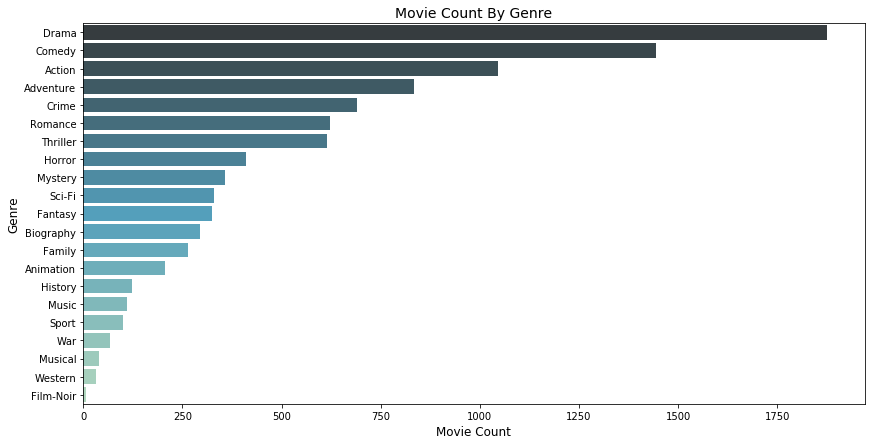

In [179]:
#Plot the above findings.
plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=m_by_genre['Movie'], y=m_by_genre['Genre'], palette='GnBu_d')
plt.xlabel('Movie Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Movie Count By Genre', fontsize=14)
plt.savefig('CountGenre');

We can see that drama, comedy, and action dominate the quantity of movie genres but does this necessarily mean these are the most profitable genres? In order to determine this we will once again group each genre but this time we are going to take a look at the average net profit for each.

In [51]:
#Once again group the movies by genre, showing the average net profit and profit margin for each.
p_by_genre = genre_budgets_df.groupby('Genre', as_index=False)[['Adjusted_Profit', 'Profit_Margin']].median().sort_values(by='Adjusted_Profit', ascending=False)


In [52]:
p_by_genre

,Genre,Adjusted_Profit,Profit_Margin
2,Animation,2.036066e+08,0.681316
1,Adventure,1.237950e+08,0.610306
16,Sci-Fi,7.619912e+07,0.596241
7,Family,7.462154e+07,0.582691
0,Action,6.433253e+07,0.519977
8,Fantasy,5.405758e+07,0.542261
18,Thriller,4.733895e+07,0.595092
13,Musical,4.663190e+07,0.652690
14,Mystery,3.963432e+07,0.614036
11,Horror,3.896335e+07,0.670497


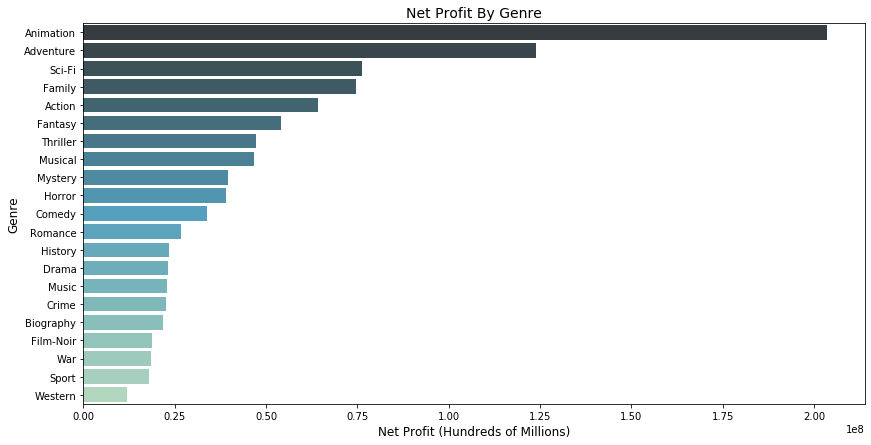

In [180]:
#Plot the above findings.
plt.figure(figsize=(14,7))
ax4 = sns.barplot(x=p_by_genre['Adjusted_Profit'], y=p_by_genre['Genre'], palette='GnBu_d')
plt.xlabel('Net Profit (Hundreds of Millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Net Profit By Genre', fontsize=14)
plt.savefig('NetProfitGenre');

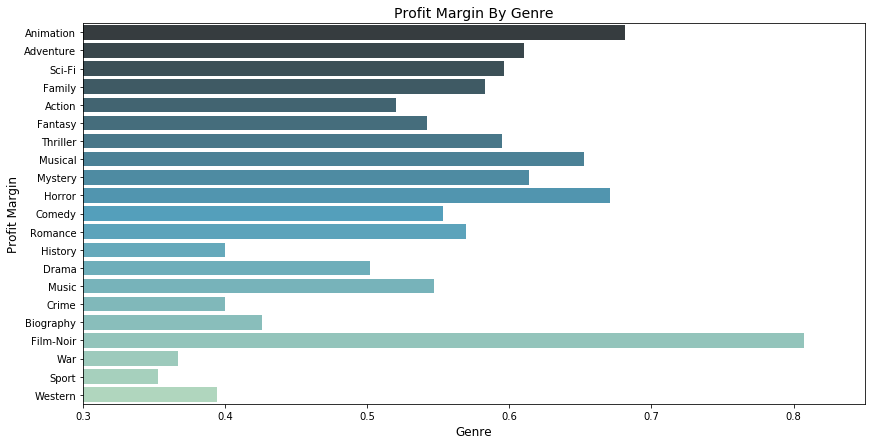

In [181]:
plt.figure(figsize=(14,7))
ax5 = sns.barplot(x=p_by_genre['Profit_Margin'], y=p_by_genre['Genre'], palette='GnBu_d')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Profit Margin By Genre', fontsize=14)
plt.xlim(0.3, 0.85)
plt.savefig('ProfitMarginGenre');

Interesting, although they are not the most commonly released genres; animation, adventure, and sci-fi typically have the most success in terms of median net profit. We can also see that Animation has a desirable profit margin along with horror and musicals. Note: although Film Noir leads with a .8+ profit margin this is based on 6 movies and has to be disregarded due to the small sample size. 

Lastly, of what percentage of the total net profit from all genres does each genre account?

In [55]:
#Grouped by genre, find the percent total of the net profit for each.
per_by_genre = genre_budgets_df.groupby(['Genre'],  as_index=False)['Adjusted_Profit'].sum().sort_values(by='Adjusted_Profit', ascending=False)
per_by_genre['Percent Total of Net Profit'] = (per_by_genre['Adjusted_Profit']/per_by_genre['Adjusted_Profit'].sum()*100).round(2)
per_by_genre

,Genre,Adjusted_Profit,Percent Total of Net Profit
1,Adventure,2.173357e+11,18.07
0,Action,1.789300e+11,14.88
4,Comedy,1.519229e+11,12.63
6,Drama,1.449900e+11,12.05
16,Sci-Fi,7.046561e+10,5.86
2,Animation,6.872099e+10,5.71
18,Thriller,6.544224e+10,5.44
8,Fantasy,5.479714e+10,4.56
15,Romance,5.051074e+10,4.20
7,Family,4.604064e+10,3.83


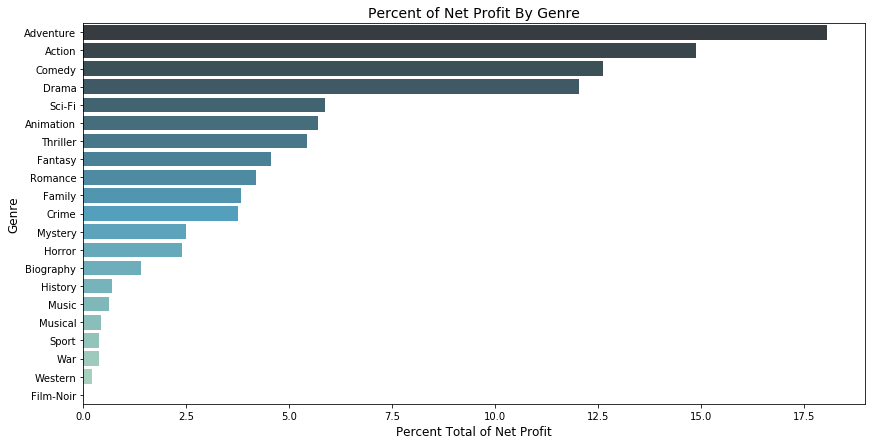

In [182]:
#Plot the above findings.
plt.figure(figsize=(14,7))
ax6 = sns.barplot(x=per_by_genre['Percent Total of Net Profit'], y=per_by_genre['Genre'], palette='GnBu_d')
plt.xlabel('Percent Total of Net Profit', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Percent of Net Profit By Genre', fontsize=14)
plt.savefig('PercentProfitGenre');

Now we can see that adventure, action, comedy and drama make up the lionshare of the overall net profits from all movies. However, from our recent observations we know there are also major opportunities in the animation and sci-fi markets due to lower saturation but high average net profits. We will soon determine which genres are most successful during which months.

**Qustion 2 Conclusion**: We recommend that Microsoft should focus their efforts on the top 6 most profitable movie genres: Adventure, Action, Comedy, Drama, Sci-Fi and Animation. A further recommendation to focus on Sci-Fi and Animation due to less competition and a higher opportunity to profit.

# Question 3: What is the best time of the year to release a movie?

In [57]:
#Convert the Release Date field to type datetime.
imdb_budgets_df['Release Date'] = pd.to_datetime(imdb_budgets_df['Release Date'])

In [58]:
#Add a new column called month, displaying only the month from the release date.
dateData =  [x.strftime('%B') for x in imdb_budgets_df['Release Date']]
imdb_budgets_df['Month'] = dateData

Let's first start by determing which months see the most movie releases.

In [59]:
#Count the total number of movies and group by month.
m_by_month = imdb_budgets_df.groupby(['Month'], as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)
m_by_month

,Month,Movie
2,December,452
10,October,424
9,November,366
11,September,358
1,August,346
6,June,327
5,July,296
7,March,270
8,May,241
0,April,238


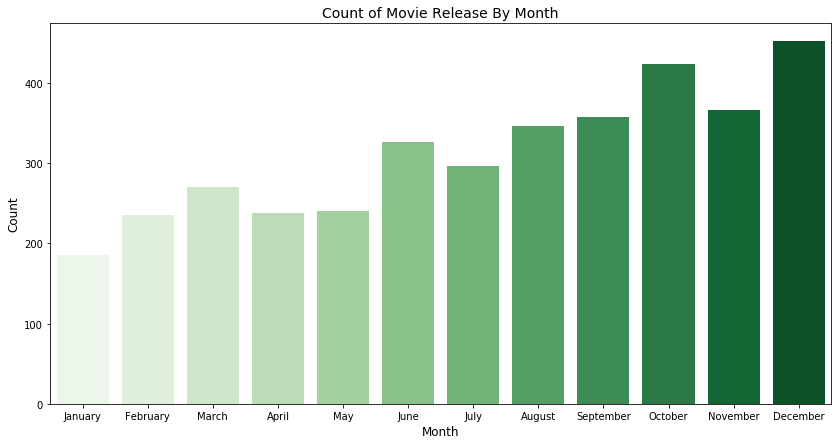

In [183]:
#Plot the above findings in order by month.
plt.figure(figsize=(14,7))
ax7 = sns.countplot(x=imdb_budgets_df['Month'], palette='Greens',
                   order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Movie Release By Month', fontsize=14)
plt.savefig('CountbyMonth');

As you can see Decemeber and October lead the way in terms of sheer quantity of movies but does this suggest a higher level of profitability? Next we will look into the average net income by movie for each month.

In [61]:
#Once again group the movies by month, showing the average net profit for each.
p_by_month = imdb_budgets_df.groupby('Month', as_index=False)[['Adjusted_Profit', 'Profit_Margin']].median().sort_values(by='Adjusted_Profit', ascending=False)
p_by_month

,Month,Adjusted_Profit,Profit_Margin
6,June,8.032764e+07,0.642956
8,May,7.937216e+07,0.638093
5,July,7.471662e+07,0.644061
2,December,5.682309e+07,0.587273
9,November,4.747665e+07,0.571790
3,February,4.108945e+07,0.563982
7,March,3.364581e+07,0.514524
0,April,3.143564e+07,0.541053
4,January,3.113234e+07,0.555721
1,August,2.538331e+07,0.522294


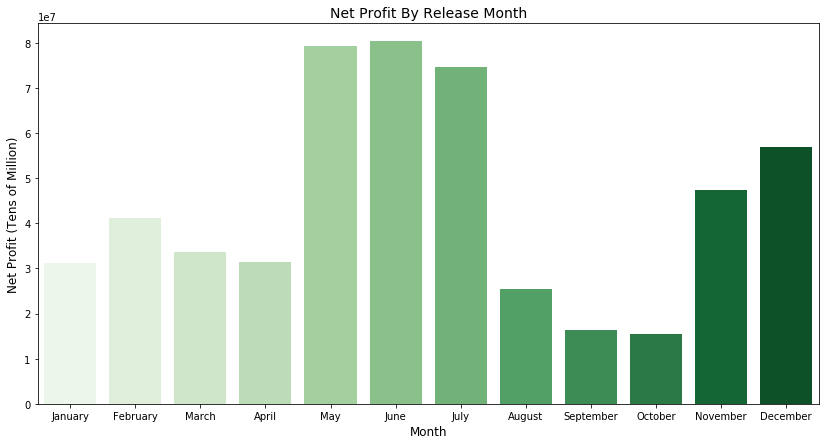

In [184]:
#Plot your above findings in order by month.
plt.figure(figsize=(14,7))
ax8 = sns.barplot(x=p_by_month['Month'], y=p_by_month['Adjusted_Profit'], palette='Greens', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Profit (Tens of Million)', fontsize=12)
plt.title('Net Profit By Release Month', fontsize=14)
plt.savefig('ProfitbyMonth');

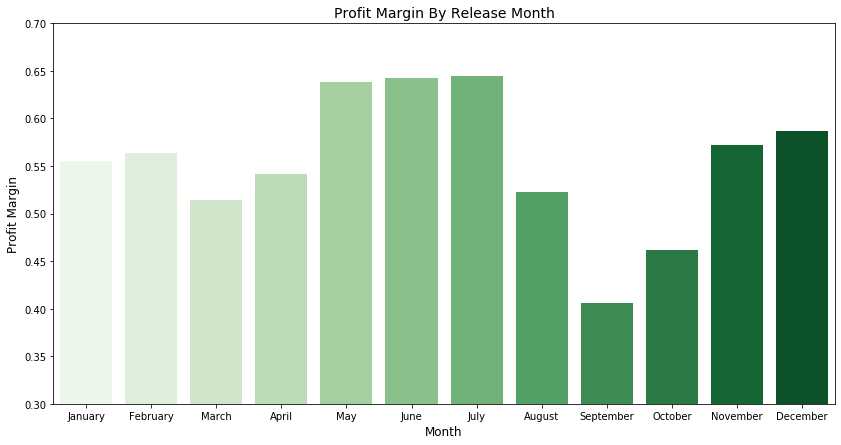

In [185]:
plt.figure(figsize=(14,7))
ax9 = sns.barplot(x=p_by_month['Month'], y=p_by_month['Profit_Margin'], palette='Greens', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Profit Margin By Release Month', fontsize=14)
plt.ylim(0.3, 0.7)
plt.savefig('MarginByMonth');

Interestingly, May, June and July shoot to the top in terms of both median net profit and profit margin. It appears that the summer months tend to result in greater success, perhaps as a result of an influx of children and their parents during summer break. Now as previously mentioned, let's dig a little further and see which genre tends to do the best in which month.

In [64]:
#Convert the Release Date field to type datetime
#Add a new column called month, displaying only the month from the release date.
genre_budgets_df['Release Date'] = pd.to_datetime(genre_budgets_df['Release Date'])
genreDate =  [x.strftime('%B') for x in genre_budgets_df['Release Date']]
genre_budgets_df['Month'] = genreDate

In [65]:
#Create a new table called month_genre consisting of Genre, Month, Net Profit, and Release Date
month_genre = genre_budgets_df[['Genre', 'Month', 'Adjusted_Profit', 'Release Date']]
#Group by Genre and Month, displaying the average Net Profit for each combination.
month_genre = month_genre.groupby(['Genre', 'Month'], as_index=False)['Adjusted_Profit'].mean().sort_values(by='Adjusted_Profit', ascending=False)

In [66]:
#Slice the top six most profitable genres from above.
Adventure_df = month_genre.loc[month_genre['Genre'].str.contains('Adventure')]
Action_df = month_genre.loc[month_genre['Genre'].str.contains('Action')]
Comedy_df = month_genre.loc[month_genre['Genre'].str.contains('Comedy')]
Drama_df = month_genre.loc[month_genre['Genre'].str.contains('Drama')]
Scifi_df = month_genre.loc[month_genre['Genre'].str.contains('Sci-Fi')]
Animation_df = month_genre.loc[month_genre['Genre'].str.contains('Animation')]

In [67]:
#Concatenate the six new tables into one new table.
genre_concat = [Adventure_df, Action_df, Comedy_df, Drama_df, Scifi_df, Animation_df]
month_genre_df = pd.concat(genre_concat)

In [68]:
#Create a table of the months in order.
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#Create a pivot table of month_genre_df, use the month_in_order table to reindex the pivot table.
month_genre_pivoted = month_genre_df.pivot(index='Month', columns='Genre', values='Adjusted_Profit').reindex(months_in_order)

In [69]:
month_genre_pivoted

Genre,Action,Adventure,Animation,Comedy,Drama,Sci-Fi
Month,,,,,,
January,6.791123e+07,1.014803e+08,2.543046e+08,7.032172e+07,4.353902e+07,8.613114e+07
February,1.077412e+08,1.491730e+08,2.736999e+08,7.812990e+07,6.380754e+07,1.234631e+08
March,1.275490e+08,2.004747e+08,2.402952e+08,8.141113e+07,5.234813e+07,1.713357e+08
April,2.593924e+08,3.714263e+08,1.355146e+08,5.005051e+07,7.719929e+07,4.009927e+08
May,3.004318e+08,3.769460e+08,5.874762e+08,1.878399e+08,9.659074e+07,3.818387e+08
June,2.651015e+08,3.929636e+08,5.877637e+08,1.754166e+08,1.123821e+08,3.668735e+08
July,2.572935e+08,2.808123e+08,3.251843e+08,1.409271e+08,1.191990e+08,2.625137e+08
August,7.899352e+07,8.112804e+07,1.081159e+08,5.270262e+07,6.563711e+07,8.081201e+07
September,5.298018e+07,9.338847e+07,1.538475e+08,5.328869e+07,4.019450e+07,1.108048e+08


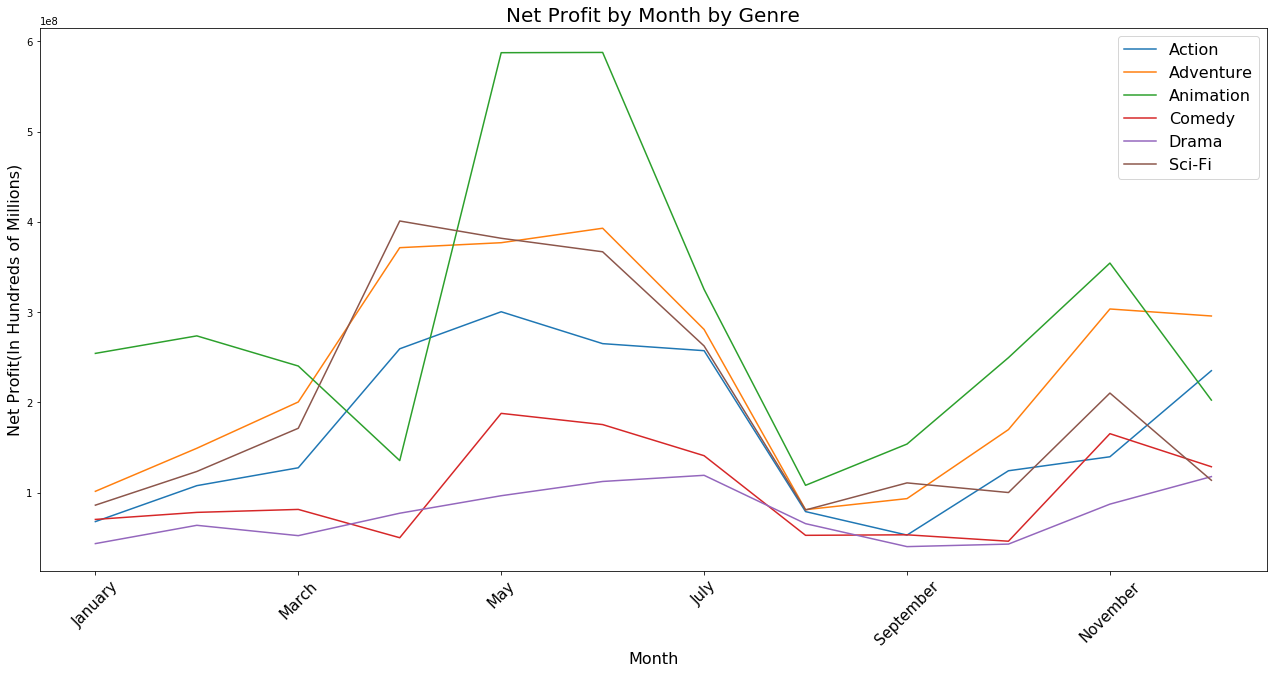

In [186]:
#Visualize the top 6 most profitable genre's by month
ax10 = month_genre_pivoted.plot(kind='line', figsize=(22, 10), rot=0)
plt.legend(prop={'size': 16})
plt.xlabel('Month', fontsize=16)
plt.ylabel('Net Profit(In Hundreds of Millions)', fontsize=16)
plt.title('Net Profit by Month by Genre', fontsize=20)
plt.xticks(fontsize=15, rotation=45)
plt.savefig('ProfitbyMonthbyGenre');

We can see that each genre follows the same basic pattern, with the summer months proving to be the most profitable time to release a movie. Some further analysis shows that releasing an animation movie in particular during the summer months will have the greatest potential for high net profits. On the other hand drama, although fluctuates slightly with the months, tends to have no impact based on release date. When considering what aspects go into creating a successful movie, it's clear that one must take take into account the impact of a well timed release date.

**Qustion 3 Conclusion**: We recommend that Microsoft release the bulk of their movies, especially Animation, during the summer months. Adventure, Drama and Comedy movies would see similar success if released in November, but the recommendation remains to focus on summer.

# Question 4: Now that we've got a better understanding of what attributes to a successful movie, which actors and directors tend to add the most value?

In this section we are going to take a look at the average net profit across all movies. From there we want to determine which actors and directors consistently appear in movies where the net profit substantially exceeds the average. We will represent this in a field called Value Above Replacement(VAR). To further simplify this concept; if across all movies the average net profit is 100 dollars and the average net profit of movies from 'Actor: X' is 200 dollars he/she would have a VAR of 2. This number represents X times over the average. To eliminate outliers we will look at actors who appear in 10 or more movies and directors who work in 5 or more.

In [71]:
#Similar to the imdb_budget_df table let's start by adjusting for inflation.
actors_df['Production Budget'] = (((2020-actors_df['Year'])*.0322)+1)*actors_df['Production Budget']
actors_df['Worldwide Gross'] = (((2020-actors_df['Year'])*.0322)+1)*actors_df['Worldwide Gross']
actors_df['Domestic Gross'] = (((2020-actors_df['Year'])*.0322)+1)*actors_df['Domestic Gross']

In [72]:
#Calculate Net Profit and Profit Margin
actors_df['Net Profit'] = actors_df['Worldwide Gross'] - actors_df['Production Budget']
actors_df['Profit Margin'] = actors_df['Net Profit'] / actors_df['Worldwide Gross']

In [73]:
#Let's filter the actors_df table to only include actors that appeared in 10 or more movies
actor_counts = actors_df['value'].value_counts()
actor_list = actor_counts[actor_counts >= 10].index.tolist()
actors_df = actors_df[actors_df['value'].isin(actor_list)]

In [74]:
#Calculate VAR, which is the average Net Profit by actor divided by average Net Profit for all movies.
actor_total = actors_df.groupby(['value'],  as_index=False)['Net Profit'].mean().sort_values(by='Net Profit', ascending=False)
actor_total['VAR'] = (actor_total['Net Profit']/actor_total['Net Profit'].mean())

In [75]:
#Create new table consisting of top 25 actors by VAR.
top_actors = actor_total.head(25)
top_actors

,value,Net Profit,VAR
113,Ian McKellen,6.426411e+08,4.562969
88,Emma Watson,5.940703e+08,4.218100
48,Chris Hemsworth,5.509931e+08,3.912237
47,Chris Evans,5.183979e+08,3.680800
262,Robert Downey Jr.,4.848850e+08,3.442847
82,Elijah Wood,4.684149e+08,3.325904
227,Mike Myers,4.516160e+08,3.206626
324,Zoe Saldana,4.184140e+08,2.970881
205,Mark Ruffalo,4.180517e+08,2.968308
166,Josh Hutcherson,3.899468e+08,2.768754


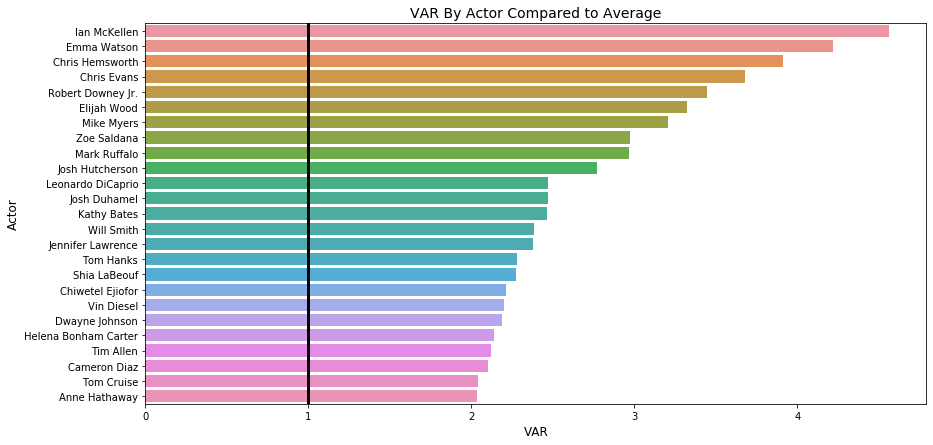

In [187]:
#Plot above finding and label the average of 1 with a black line.
plt.figure(figsize=(14,7))
ax11 = sns.barplot(x=top_actors['VAR'], y=top_actors['value'])
plt.axvline(1, ls='-', color='black', linewidth=3)
plt.xlabel('VAR', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.title('VAR By Actor Compared to Average', fontsize=14)
plt.savefig('VARActor');

Wow, from this list we can see that all of these actors consistently appear in very profitable movies; anywhere from two times the norm to four and a half times the norm. When casting a movie this is a good short-list from where to start making calls.

In [77]:
#Adjust directors table for inflation.
directors_df['Production Budget'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Production Budget']
directors_df['Worldwide Gross'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Worldwide Gross']
directors_df['Domestic Gross'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Domestic Gross']

In [78]:
#Calucalte Net Profit and Profit Margin.
directors_df['Net Profit'] = directors_df['Worldwide Gross'] - directors_df['Production Budget']
directors_df['Profit Margin'] = directors_df['Net Profit'] / directors_df['Worldwide Gross']

In [79]:
#Let's filter the actors_df table to only include actors that appeared in 5 or more movies.
director_counts = directors_df['value'].value_counts()
director_list = director_counts[director_counts >= 5].index.tolist()
directors_df = directors_df[directors_df['value'].isin(director_list)]

In [80]:
#Calculate VAR, which is the average Net Profit by director divided by average Net Profit for all movies.
director_total = directors_df.groupby(['value'],  as_index=False)['Net Profit'].mean().sort_values(by='Net Profit', ascending=False)
director_total['VAR'] = (director_total['Net Profit']/actor_total['Net Profit'].mean())

In [81]:
#Create new table consisting of top 25 directors by VAR.
top_directors = director_total.head(25)
top_directors

,value,Net Profit,VAR
78,James Cameron,1.244750e+09,8.838147
11,Anthony Russo,1.017389e+09,7.223809
89,Joe Russo,1.017389e+09,7.223809
115,Lee Unkrich,9.120679e+08,6.475990
148,Peter Jackson,8.218780e+08,5.835612
50,David Yates,6.881352e+08,4.885993
104,Jon Favreau,6.287041e+08,4.464012
129,Michael Bay,5.888046e+08,4.180712
96,John Lasseter,5.772545e+08,4.098702
31,Christopher Nolan,5.765089e+08,4.093408


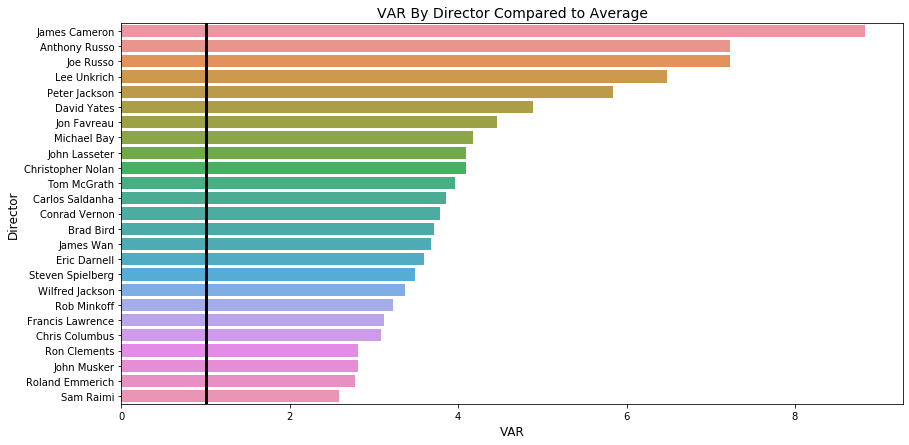

In [188]:
#Plot above finding and label the average of 1 with a black line.
plt.figure(figsize=(14,7))
ax12 = sns.barplot(x=top_directors['VAR'], y=top_directors['value'])
plt.axvline(1, ls='-', color='black', linewidth=3)
plt.xlabel('VAR', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.title('VAR By Director Compared to Average', fontsize=14)
plt.savefig('VARDirector');

It appears that the most significant value added comes from the directors chair. James Cameron movies on average make almost nine times the amount of the average movie, this emphasizes what great leadership represents on a set. If we wanted to further investigate which actors and directors make the most impact it would be important to determine which genre of movies they appear in most.

**Qustion 4 Conclusion**: We recommend that Microsoft focus their cast and crew search to individuals who consistently score at least 1.0 on the VAR score. We can, with a high level of confidence, conclude that these individuals will elevate the overall production.

# Question 5: How much should you spend on a movie to win an Oscar?

In order to answer this question we'll first need to join the `imdb_budgets_df` dataframe and the `awards_df` dataframe.  As there may be movies with duplicate titles, we set the indices of both dataframes to the movie name and year so that matching data is correctly joined.

In [83]:
imdb_budgets_df.set_index(['Movie','Year'], inplace=True)
awards_df.set_index(['film_name', 'film_year'], inplace=True)

In [84]:
budgets_and_awards = imdb_budgets_df.join(awards_df, how='inner', on=['Movie', 'Year'])
budgets_and_awards.head()

,,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month,awards_won,awards_nominated,win_rate
Movie,Year,,,,,,,,,,,,,,,,
Avatar,2009,7.8,PG-13,162,"[Action, Adventure, Fantasy]",2009-12-17,237000000,760507625,2788701337,2551701337,0.915014,320945400.0,3.455514e+09,December,3,9,0.333
Black Panther,2018,7.3,PG-13,134,"[Action, Adventure, Sci-Fi]",2018-02-13,200000000,700059566,1346103376,1146103376,0.851423,212880000.0,1.219912e+09,February,3,7,0.429
Titanic,1997,7.8,PG-13,194,"[Drama, Romance]",1997-12-18,200000000,659363944,2208208395,2008208395,0.909429,348120000.0,3.495488e+09,December,11,14,0.786
The Dark Knight,2008,9.0,PG-13,152,"[Action, Crime, Drama]",2008-07-11,185000000,533720947,1000742751,815742751,0.815137,256484000.0,1.130946e+09,July,2,8,0.250
Toy Story 4,2019,7.8,G,100,"[Animation, Adventure, Comedy]",2019-06-20,200000000,434038008,1073394813,873394813,0.813675,206440000.0,9.015181e+08,June,1,2,0.500


We've successfully joined the two dataframes. Let's filter the dataframe to include movies where the profit is greater than 0.

In [85]:
nominated_movies_df = budgets_and_awards.loc[budgets_and_awards['Profit'] > 0]

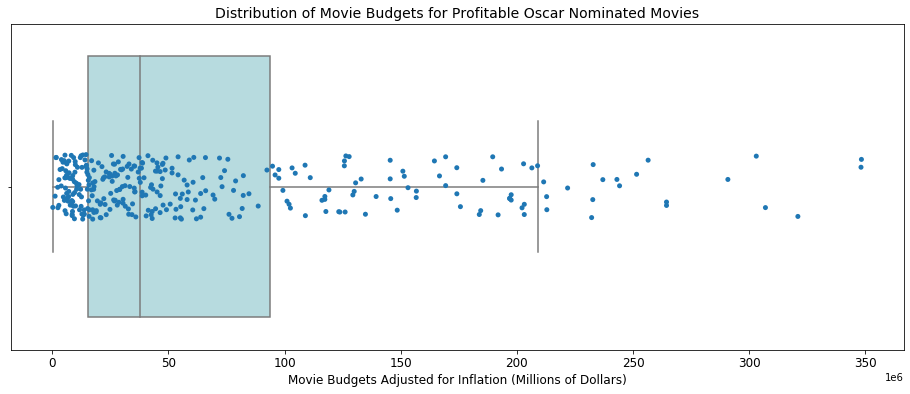

In [189]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Adjusted_Budget', data=nominated_movies_df, showfliers=False, color='powderblue')
sns.stripplot(x='Adjusted_Budget', data=nominated_movies_df)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.xticks(fontsize=12)
plt.xlabel('Movie Budgets Adjusted for Inflation (Millions of Dollars)', fontsize=12);
plt.title('Distribution of Movie Budgets for Profitable Oscar Nominated Movies', fontsize=14)
plt.savefig('Oscar_Nominated');

In [87]:
nominated_movies_df['Adjusted_Budget'].describe()

count    3.310000e+02
mean     6.647934e+07
std      7.249719e+07
min      2.127900e+05
25%      1.542566e+07
50%      3.781650e+07
75%      9.359800e+07
max      3.483000e+08
Name: Adjusted_Budget, dtype: float64

By looking at the distribution of movie budgets we see that the majority of data is clustered in an area below $100 million dollars.

We need to take this a step further as the above distribution includes movies that were nominated and won awards as well as movies that did not win awards. In order to properly answer our question we must win an Oscar.

We could filter by win rate and exclude those movies that did not win anything, however our data would still include movies that were nominated in a single category and won. This would skew the win rate as there would be several movies with a win rate of 100%.  Let's take a look at the mean and median win rate to establish a threshold for award nominations.

In [88]:
nominated_movies_df['win_rate'].describe()
#Let's be conservative for win rate and use the median win rate
#That means we would need to be nominated for at least 3 awards in order to win 1 award.

count    330.000000
mean       0.448203
std        0.279846
min        0.000000
25%        0.250000
50%        0.392500
75%        0.600000
max        1.000000
Name: win_rate, dtype: float64

The mean win rate is 44.8% but as we mentioned is skewed by those movies with only 1 nomination. The median win rate is 39.2% which should be less skewed by the data and is a more conservative number. Using the median win rate of 39.2%, our movie would need to be nominated for at least 3 awards in order to get at least one win. 3 nominations will be the cutoff.

263


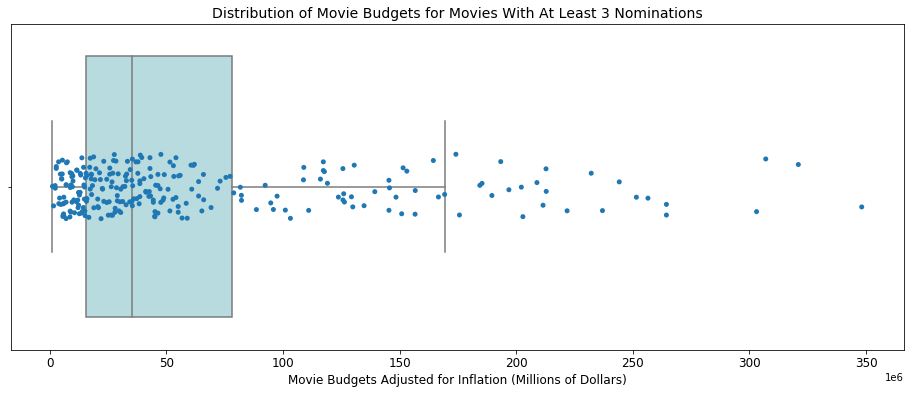

In [190]:
nominated_over_three = nominated_movies_df.loc[nominated_movies_df['awards_nominated'] >= 3]
print(len(nominated_over_three))
plt.figure(figsize=(16,6))
sns.boxplot(x=nominated_over_three['Adjusted_Budget'], showfliers=False, color='powderblue')
sns.stripplot(x='Adjusted_Budget', data=nominated_over_three)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.xticks(fontsize=12)
plt.xlabel('Movie Budgets Adjusted for Inflation (Millions of Dollars)', fontsize=12)
plt.title('Distribution of Movie Budgets for Movies With At Least 3 Nominations', fontsize=14)
plt.savefig('3_Nominations');

In [90]:
nominated_over_three['Adjusted_Budget'].describe()

count    2.630000e+02
mean     6.240465e+07
std      6.912684e+07
min      1.224990e+06
25%      1.548290e+07
50%      3.546500e+07
75%      7.813200e+07
max      3.481200e+08
Name: Adjusted_Budget, dtype: float64

It's important to note that the box plot of the `nominated_over_three` dataframe has shrunk! This means that our filter has decreased our interquartile range for the movie budget.  Since this range is smaller there should be less variability in the middle of the data set. Since we have adjusted budgets that are extreme outliers, it is best to use the median as the primary measure of central tendency. The median adjusted budget for this data is \\$35,465,000. 
 
**Question 5 Conclusion**: Microsoft should spend at least $35,465,000 in order to make an Oscar-winning movie.

*It is also worth noting that the 75th percentile of the adjusted budget for movies with at least three nominations is $78,132,000. This is close to our recommendation of a \\$82 million budget for a profitable movie with a profit margin of approximately 80%.*

# Question 6: What impact, if any, does runtime and movie rating have on Net Profit, Profit Margin and IMDb rating?

Let's first start by analyzing the ratings. We want to include only movies rated G, PG, PG-13 or R.

In [100]:
rating_counts = imdb_budgets_df['Rating'].value_counts()
rating_list = rating_counts[rating_counts >= 50].index.tolist()
rating_df = imdb_budgets_df[imdb_budgets_df['Rating'].isin(rating_list)]

In [101]:
rating_df = rating_df.reset_index()
rating_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month
0,Avengers: Endgame,2019,8.4,PG-13,181,"[Action, Adventure, Drama]",2019-04-23,400000000,858373000,2797800564,2397800564,0.857031,412880000.0,2.475010e+09,April
1,Avatar,2009,7.8,PG-13,162,"[Action, Adventure, Fantasy]",2009-12-17,237000000,760507625,2788701337,2551701337,0.915014,320945400.0,3.455514e+09,December
2,Black Panther,2018,7.3,PG-13,134,"[Action, Adventure, Sci-Fi]",2018-02-13,200000000,700059566,1346103376,1146103376,0.851423,212880000.0,1.219912e+09,February
3,Avengers: Infinity War,2018,8.4,PG-13,149,"[Action, Adventure, Sci-Fi]",2018-04-25,300000000,678815482,2048359754,1748359754,0.853541,319320000.0,1.860954e+09,April
4,Titanic,1997,7.8,PG-13,194,"[Drama, Romance]",1997-12-18,200000000,659363944,2208208395,2008208395,0.909429,348120000.0,3.495488e+09,December


In [102]:
#Count the total number of movies and group by month.
rating_count = rating_df.groupby(['Rating'], as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)
rating_count

,Rating,Movie
3,R,1631
2,PG-13,1339
1,PG,590
0,G,93


In [103]:
#Group by Rating let's determine which has the highest median net profit and profit margin.
rating_df2 = rating_df.groupby(['Rating'], as_index=False)[['Adjusted_Profit', 'Profit_Margin', 'IMDb']].median().sort_values(by='Adjusted_Profit', ascending=False)
rating_df2

,Rating,Adjusted_Profit,Profit_Margin,IMDb
0,G,1.543768e+08,0.760594,7.1
1,PG,7.540419e+07,0.617626,6.5
2,PG-13,4.956577e+07,0.546660,6.3
3,R,2.040247e+07,0.505431,6.6


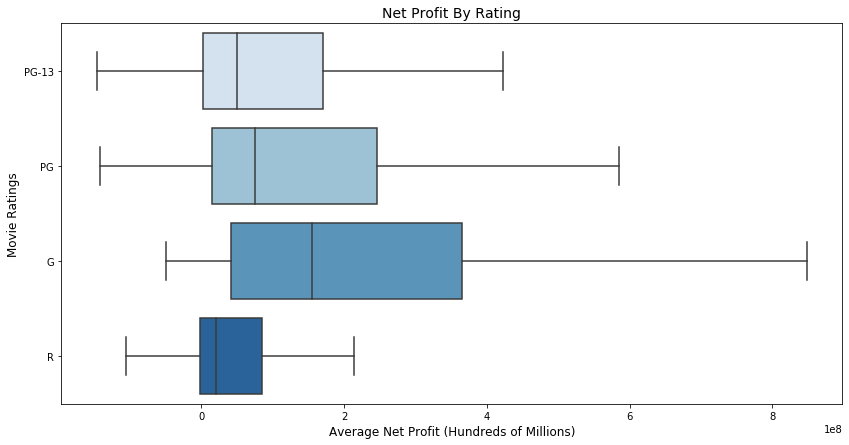

In [191]:
# Plot your above findings
plt.figure(figsize=(14,7))
ax13 = sns.boxplot( y=rating_df["Rating"], x=rating_df["Adjusted_Profit"], showfliers=False, palette='Blues')
plt.xlabel('Average Net Profit (Hundreds of Millions)', fontsize=12)
plt.ylabel('Movie Ratings', fontsize=12)
plt.title('Net Profit By Rating', fontsize=14)
plt.savefig('ProfitbyRating');

As you can see, G and PG rated movies tend to perform best and account for the smallest market share. This, like the animation genre, is another opportunity to enter the market in a highly profitable arena with fewer competitors. It would be interesting to see a breakdown of total net profit by genre by rating to get a better idea of which rating and genres go best together.

In [105]:
# First drop the rating column from genre_budgets_df and genre from rating_df
genre_rating_df = genre_budgets_df.drop(['Rating'], axis=1)
rating_df = rating_df.drop(['Genre'], axis=1)

In [106]:
# Merge the genre_rating_df table and rating_df table
genre_rating_df = pd.merge(genre_rating_df, rating_df)

In [107]:
#Slice the top six most profitable genres.
Adv_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Adventure')]
Act_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Action')]
Com_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Comedy')]
Dra_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Drama')]
Sci_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Sci-Fi')]
Ani_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Animation')]

genre_concat = [Adv_df, Act_df, Com_df, Dra_df, Sci_df, Ani_df]
genre_rating = pd.concat(genre_concat)

In [108]:
# Create a pivot table from genre_rating
gr_df = genre_rating.groupby(['Genre', 'Rating'],  as_index=False)['Adjusted_Profit'].sum().sort_values(by='Adjusted_Profit', ascending=False)
gr_pivoted = gr_df.pivot(index='Genre', columns='Rating', values='Adjusted_Profit')

In [109]:
# Preview the table.
gr_pivoted

Rating,G,PG,PG-13,R
Genre,,,,
Action,4.767140e+08,2.480650e+10,1.184765e+11,3.452782e+10
Adventure,1.749756e+10,7.465683e+10,1.141805e+11,1.066331e+10
Animation,2.045177e+10,4.679251e+10,6.826376e+08,1.203686e+08
Comedy,1.498990e+10,6.173386e+10,4.472262e+10,3.009565e+10
Drama,6.452247e+09,1.978580e+10,6.469567e+10,5.055767e+10
Sci-Fi,5.751998e+08,4.693468e+09,5.404536e+10,1.107281e+10


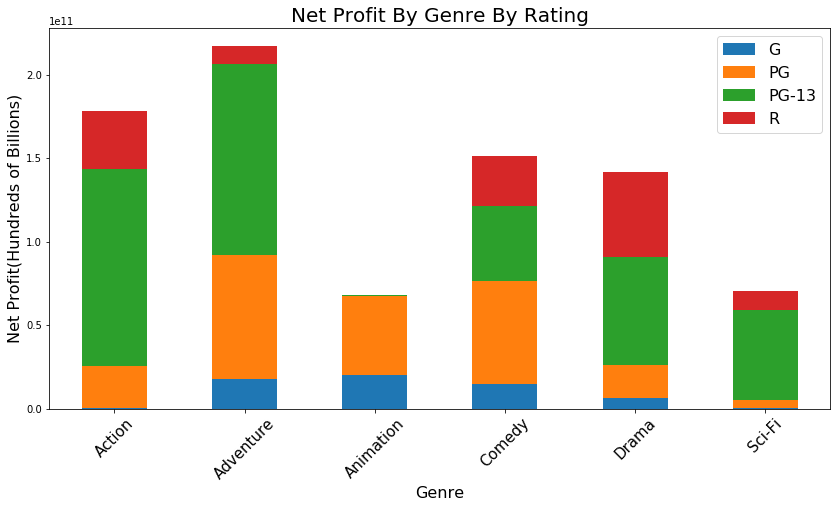

In [192]:
# Plot the above findings.
ax14 = gr_pivoted.plot(kind='bar', stacked=True, figsize=(14,7))
plt.legend(prop={'size': 16})
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Net Profit(Hundreds of Billions)', fontsize=16)
plt.title('Net Profit By Genre By Rating', fontsize=20)
plt.xticks(fontsize=15, rotation=45)
plt.savefig('ProfitbyGenrebyRating');

As one could have probably guessed, animation is almost entirely made up of G and PG rated movies. We can see that for most other genres, the bulk of their total net profits come from PG-13 rated movies. From this we can focus on which rating to aim for in each genre to evoke the most success.

Now let's shift our focus to the film's runtime. Does movie length have an impact in terms of success?

In [111]:
# Create a new table with runtime, net profit and profit margin.
runtime_df = imdb_budgets_df[['Runtime', 'Adjusted_Profit', 'Profit_Margin']]
runtime_df

,,Runtime,Adjusted_Profit,Profit_Margin
Movie,Year,,,
Avengers: Endgame,2019,181,2.475010e+09,0.857031
Avatar,2009,162,3.455514e+09,0.915014
Black Panther,2018,134,1.219912e+09,0.851423
Avengers: Infinity War,2018,149,1.860954e+09,0.853541
Titanic,1997,194,3.495488e+09,0.909429
...,...,...,...,...
The Misfits,1961,125,1.217916e+07,0.512195
Judgment at Nuremberg,1961,179,2.029860e+07,0.700000
The Wrong Man,1956,105,2.448640e+06,0.400000


In [112]:
# Let's start by taking a look at the correlation between runtime and net profit/profit margin.
pearsoncorr = runtime_df.corr(method='pearson')
pearsoncorr

,Runtime,Adjusted_Profit,Profit_Margin
Runtime,1.000000,0.223064,0.051121
Adjusted_Profit,0.223064,1.000000,0.051121
Profit_Margin,0.051121,0.051121,1.000000


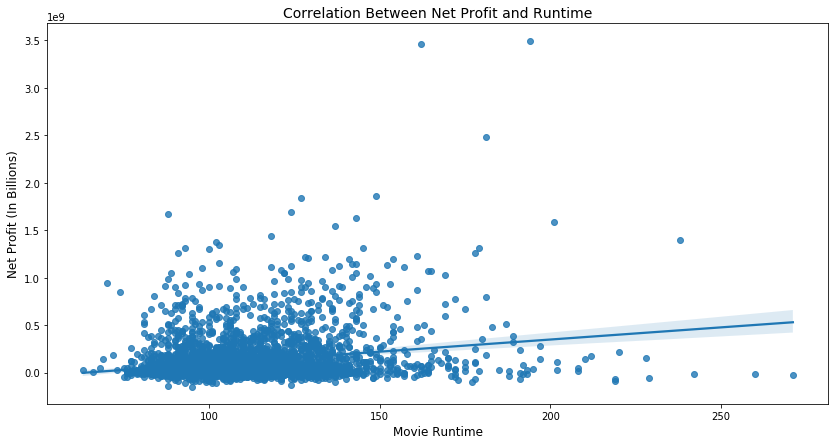

In [193]:
# Plot the correlation.
plt.figure(figsize=(14,7))
ax15 = sns.regplot(x='Runtime', y='Adjusted_Profit', data=imdb_budgets_df)
plt.xlabel('Movie Runtime', fontsize=12)
plt.ylabel('Net Profit (In Billions)', fontsize=12)
plt.title('Correlation Between Net Profit and Runtime', fontsize=14)
plt.savefig('CorrProfitRuntime');

Although there is a small positive correlation of .223 showing that the long the runtime the higher the net profit, it's incredibly minute. With that in mind, we can take from this that, typically, it is not important to keep a movie above or below a cetain time threshold.

**Question 6 Conclusion**: We recommend that Microsoft take into consideration the rating of the movie based on the genre and target audience. If making animation movies, it is wise to stick to a G or PG rating, otherwise PG-13 is the sweetspot. In terms of runtime, there is little correlation in terms of overall profitability.

# Question 7: Sticking to our analysis of Net Profit and Profit Margin, what should Microsoft determine to be the baseline for sustainable success?

We have an understanding of what goes into a successful movie but let's determine what Microsoft should expect in terms of profitability if they expect to compete with the other top movie studios.

In [236]:
# Merge studio_df and imdb_budgets_df
studiobudgets_df = pd.merge(studio_df, imdb_budgets_df, left_on = 'title', right_on='Movie') 
studiobudgets_df.head()

,title,studio,domestic_gross,foreign_gross,year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month
0,Toy Story 3,Buena Vista,415000000.0,652000000,2010,8.3,G,103,"[Animation, Adventure, Comedy]",2010-06-18,200000000,415004880,1068879522,868879522,0.812888,264400000.0,1.148659e+09,June
1,Inception,WB,292600000.0,535700000,2010,8.8,PG-13,148,"[Action, Adventure, Sci-Fi]",2010-07-16,160000000,292576195,832551961,672551961,0.807820,211520000.0,8.891137e+08,July
2,Shrek Forever After,Pixar/Dreamworks,238700000.0,513900000,2010,6.3,PG,93,"[Animation, Adventure, Comedy]",2010-05-21,165000000,238736787,756244673,591244673,0.781817,218130000.0,7.816255e+08,May
3,The Twilight Saga: Eclipse,Sumbadhat Productions,300500000.0,398000000,2010,5.0,PG-13,124,"[Adventure, Drama, Fantasy]",2010-06-30,68000000,300531751,706102828,638102828,0.903697,89896000.0,8.435719e+08,June
4,Iron Man 2,Paramount,312400000.0,311500000,2010,7.0,PG-13,124,"[Action, Adventure, Sci-Fi]",2010-05-07,170000000,312433331,621156389,451156389,0.726317,224740000.0,5.964287e+08,May


In [237]:
# Let's remove some unnecessary fields.
studiobudgets_df.drop(columns = {'title', 'domestic_gross', 'Domestic Gross', 'foreign_gross', 'year', 'Production Budget', 'Worldwide Gross', 'Profit'}, inplace = True)
studiobudgets_df.rename(columns = {'studio':'Studio','Worldwide Gross ':'Worldwide Gross' }, inplace = True) 
studiobudgets_df.head()

,Studio,IMDb,Rating,Runtime,Genre,Release Date,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month
0,Buena Vista,8.3,G,103,"[Animation, Adventure, Comedy]",2010-06-18,0.812888,264400000.0,1.148659e+09,June
1,WB,8.8,PG-13,148,"[Action, Adventure, Sci-Fi]",2010-07-16,0.807820,211520000.0,8.891137e+08,July
2,Pixar/Dreamworks,6.3,PG,93,"[Animation, Adventure, Comedy]",2010-05-21,0.781817,218130000.0,7.816255e+08,May
3,Sumbadhat Productions,5.0,PG-13,124,"[Adventure, Drama, Fantasy]",2010-06-30,0.903697,89896000.0,8.435719e+08,June
4,Paramount,7.0,PG-13,124,"[Action, Adventure, Sci-Fi]",2010-05-07,0.726317,224740000.0,5.964287e+08,May


In [254]:
# Group by studio, find median and filter to top 25 by Adjusted Profit
profit_by_studiodf = studiobudgets_df.groupby('Studio').median()
profit_by_studiodf = profit_by_studiodf.reset_index()                                        
profit_by_studiodf = profit_by_studiodf.nlargest(25, 'Adjusted_Profit')
profit_by_studiodf

,Studio,IMDb,Runtime,Profit_Margin,Adjusted_Budget,Adjusted_Profit
51,UTV,8.45,141.5,0.958798,33747300.0,6.921112e+08
37,Pixar/Dreamworks,6.70,94.0,0.716170,182352000.0,4.921191e+08
9,Buena Vista,7.10,117.0,0.667056,176565000.0,1.928538e+08
28,MBox,7.80,158.0,0.624019,116082000.0,1.926625e+08
48,Strand,6.50,112.0,0.741792,50796000.0,1.459292e+08
45,Sony,6.30,105.0,0.658692,65796000.0,1.296401e+08
35,Paramount,6.40,110.0,0.639187,53053600.0,1.270562e+08
20,Fox,6.35,106.0,0.644465,65785200.0,1.171804e+08
52,Universal,6.20,108.0,0.686945,47728000.0,1.081619e+08
54,WB,6.60,113.5,0.542261,66914000.0,8.010906e+07


In [253]:
# Let's take a look at the average of these median values.
profit_by_studiodf.describe()

,IMDb,Runtime,Profit_Margin,Adjusted_Budget,Adjusted_Profit
count,25.00000,25.000000,25.000000,2.500000e+01,2.500000e+01
mean,6.76600,112.180000,0.663049,4.883893e+07,1.134278e+08
std,0.64108,16.751169,0.122761,4.612474e+07,1.557719e+08
min,5.80000,94.000000,0.446140,2.822000e+06,1.587142e+07
25%,6.35000,103.500000,0.600112,2.192660e+07,3.370892e+07
50%,6.60000,108.000000,0.658692,3.305360e+07,5.004866e+07
75%,7.10000,112.000000,0.716170,5.305360e+07,1.270562e+08
max,8.45000,160.000000,0.958798,1.823520e+08,6.921112e+08


We can see that if we want to strive to be in the top half of this elite list of movie studios we need to have a profit margin of 66% and a net profit of 50 million per movie.

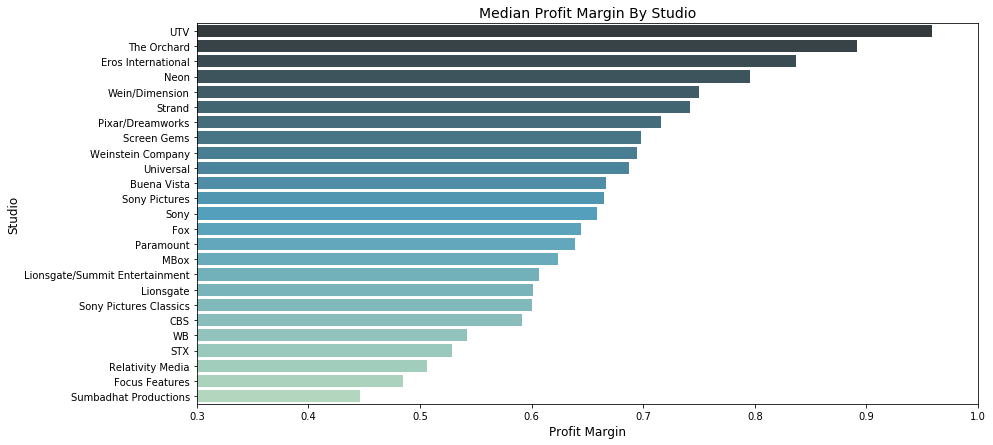

In [256]:
#Plot the above findings.
plt.figure(figsize=(14,7))
ax16 = sns.barplot(x=profit_by_studiodf['Profit_Margin'], y=profit_by_studiodf['Studio'],
                   order=profit_by_studiodf.sort_values('Profit_Margin', ascending=False).Studio, palette='GnBu_d')
plt.xlabel('Profit Margin', fontsize=12)
plt.ylabel('Studio', fontsize=12)
plt.title('Median Profit Margin By Studio', fontsize=14)
plt.xlim(0.3, 1.0)
plt.savefig('ProfitMarginStudio')

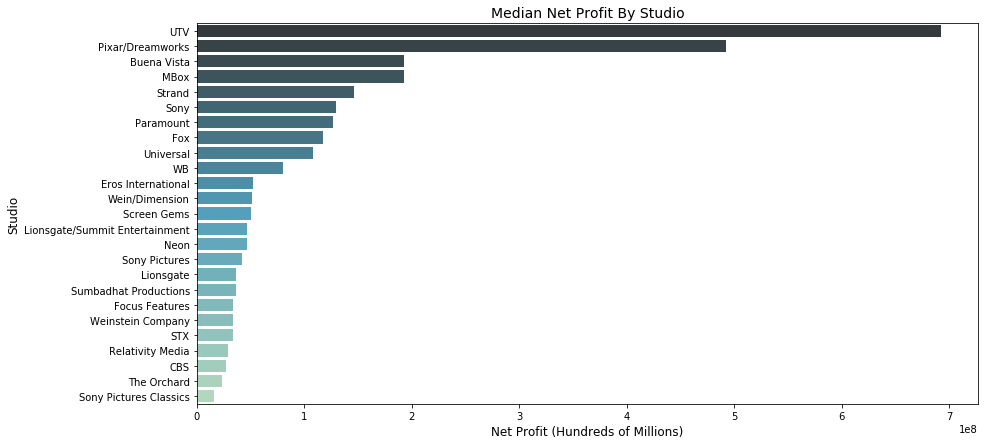

In [255]:
#Plot the above findings.
plt.figure(figsize=(14,7))
ax16 = sns.barplot(y=profit_by_studiodf['Studio'], x=profit_by_studiodf['Adjusted_Profit'], palette='GnBu_d')
plt.xlabel('Net Profit (Hundreds of Millions)', fontsize=12)
plt.ylabel('Studio', fontsize=12)
plt.title('Median Net Profit By Studio', fontsize=14)
plt.savefig('NetProfitStudio');

We can see from the graph above that the major players in the studio industry have profit margins ranging from 24% to 95%. That's quite a large range to define success. However, the top 25 studios shown are many of the studios that we often recognize when we go to the movies. As we've done previously, we use the median profit margin of the top 25 as a target for success among major studios. That profit margin is 66%.
In the next analysis we'll take a closer look at some of these major studios to see what metrics we should try to mimic. Let's also keep this in mind as we go into our next analysis: UTV which has the greatest profit margin of all the studios is a subsidiary of Disney.

**Question 7 Conclusion**: Microsoft should aim for a profit margin of 66% and a net profit of slightly over 50 million per movie to compete with the top existing studios.

# Question 8: Based on the success of current competitors, which should we look to for best practices?

We need to add a column to the `theaters_df` dataframe to calculate the money grossed per theater for a given movie.  Then we can group by studio.

In [116]:
theaters_df['dollars_per_theater'] = theaters_df['total_dom_gross($)'] / theaters_df['max_theaters']
theaters_df.head()

,title,max_theaters,year,total_dom_gross($),studio,dollars_per_theater
0,The Lion King,4802,2019,543638043,Disney,113210.754477
1,Avengers: Endgame,4662,2019,858373000,Disney,184121.192621
2,Spider-Man: Far from Home,4634,2019,390532085,Sony,84275.374407
3,Toy Story 4,4575,2019,434038008,Disney,94871.695738
4,It Chapter Two,4570,2019,211593228,Warner Bros.,46300.487527


In [117]:
#Let's see what the average is for max number of theaters and for gross per theater for each studio
average_theaters = theaters_df.groupby('studio').mean()
average_theaters_ranked = average_theaters.sort_values(by=['studio'],ascending=False)
average_theaters_ranked.reset_index(inplace=True)
average_theaters

,max_theaters,year,total_dom_gross($),dollars_per_theater
studio,,,,
Disney,3682.319728,2010.591837,2.026179e+08,51856.141904
DreamWorks Distribution,3408.263158,2002.947368,1.181983e+08,33102.055326
Lionsgate,3356.244898,2014.469388,9.526829e+07,26485.343053
Metro-Goldwyn-Mayer (MGM),3259.142857,2004.000000,7.843758e+07,23829.208308
New Line Cinema,3410.571429,2001.857143,2.497181e+08,72518.242699
Paramount Pictures,3466.705357,2010.714286,1.086149e+08,30508.472763
Sony,3478.355556,2010.562963,1.166779e+08,32626.668858
TriStar Pictures,3146.000000,2014.000000,8.070322e+07,25546.753029
Twentieth Century Fox,3493.975758,2011.212121,1.110098e+08,31119.138124


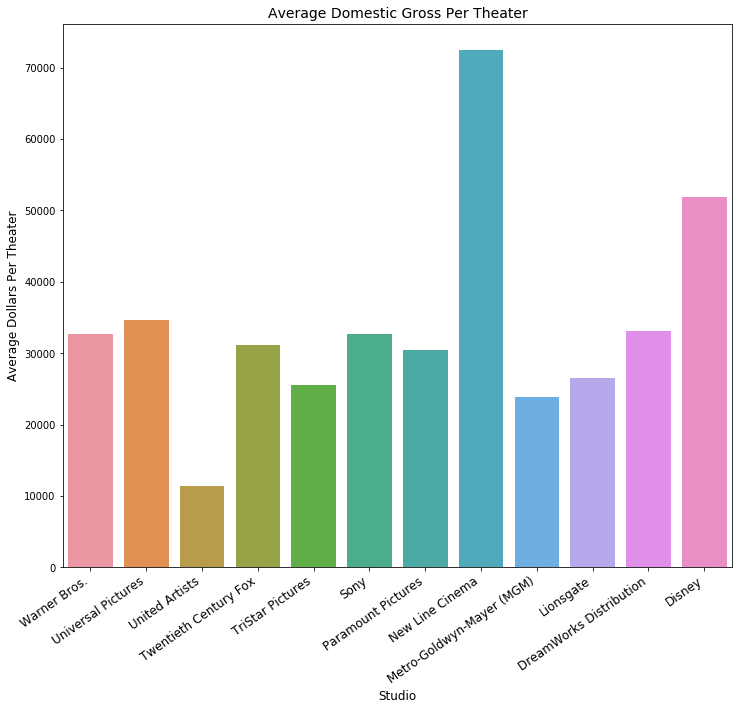

In [194]:
plt.figure(figsize=(12,10))
ax16 = sns.barplot(x='studio', y='dollars_per_theater', data=average_theaters_ranked)
plt.xlabel('Studio', fontsize=12)
plt.title("Average Domestic Gross Per Theater", fontsize=14);
plt.ylabel('Average Dollars Per Theater', fontsize=12);
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.savefig('DomesticPerTheater');

In the bar plot above, Disney and New Line Cinema stand out. We need to double check that there are an appropriate number of movies by each of these studios before jumping to conclusions.

In [119]:
theaters_df['studio'].value_counts()

Warner Bros.                 208
Twentieth Century Fox        165
Disney                       147
Universal Pictures           136
Sony                         135
Paramount Pictures           112
Lionsgate                     49
DreamWorks Distribution       19
Metro-Goldwyn-Mayer (MGM)     14
New Line Cinema                7
TriStar Pictures               7
United Artists                 1
Name: studio, dtype: int64

We can see that New Line Cinema only has 7 movies in this dataframe which means that their average domestic gross per theater is going to be skewed.  Disney is certainly still a possibility and we should also consider Warner Bros. and Twentieth Century Fox.

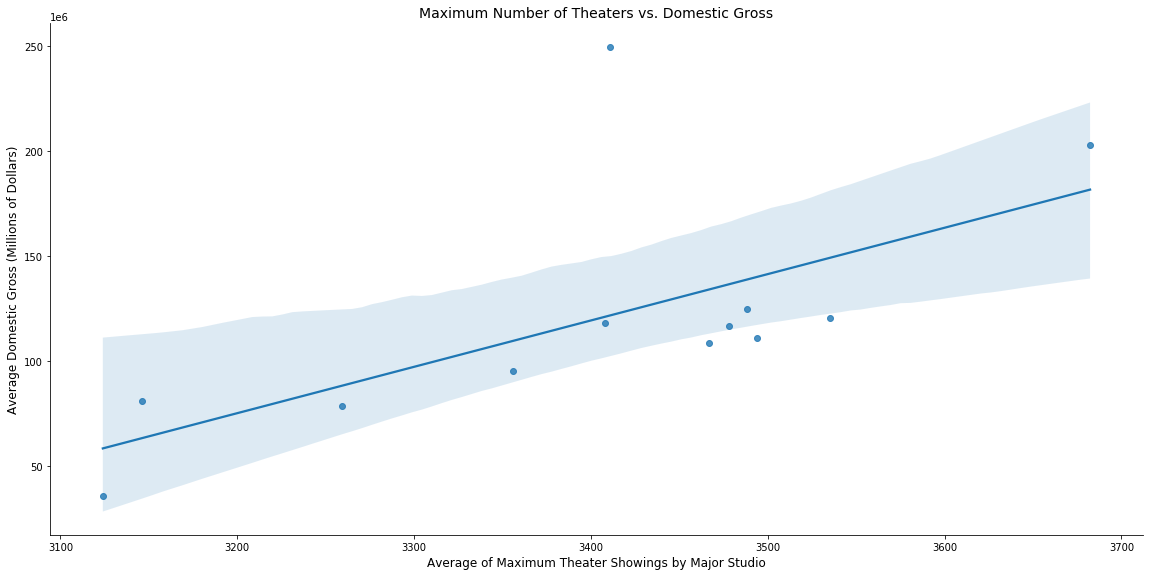

In [195]:
ax17 = sns.lmplot(x='max_theaters', y='total_dom_gross($)', data=average_theaters, height=8, aspect=2)
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
plt.xlabel('Average of Maximum Theater Showings by Major Studio', fontsize=12)
plt.ylabel('Average Domestic Gross (Millions of Dollars)', fontsize=12)
plt.title('Maximum Number of Theaters vs. Domestic Gross', fontsize=14)
plt.savefig('TheatersVGross');

The scatter plot shows a positive trend between the average number of theaters and the average domestic gross. The sole outlier is New Line Cinemas due to how few movies they are associated with in our dataframe. Disney is farthest to the right and above the trend line further proving that they should be a strong consideration.

We'll join the theater and awards dataframes so that we can see which studios have the best win rate at the Oscars.

In [121]:
theaters_df.set_index(['title', 'year'], inplace=True)

In [122]:
theaters_and_awards = theaters_df.join(awards_df, how='inner', on=['title', 'year'])

In [123]:
theaters_and_awards.groupby('studio').count()

,max_theaters,total_dom_gross($),dollars_per_theater,awards_won,awards_nominated,win_rate
studio,,,,,,
Disney,22,22,22,22,22,22
DreamWorks Distribution,4,4,4,4,4,4
New Line Cinema,2,2,2,2,2,2
Paramount Pictures,7,7,7,7,7,7
Sony,6,6,6,6,6,6
Twentieth Century Fox,4,4,4,4,4,4
Universal Pictures,6,6,6,6,6,6
Warner Bros.,15,15,15,15,15,15


In [124]:
theaters_and_awards.groupby('studio').mean()

,max_theaters,total_dom_gross($),dollars_per_theater,awards_won,awards_nominated,win_rate
studio,,,,,,
Disney,3818.727273,3.052172e+08,78797.606486,1.363636,3.000000,0.599045
DreamWorks Distribution,3444.250000,1.532236e+08,44447.628709,2.000000,4.250000,0.604250
New Line Cinema,3662.500000,3.584086e+08,97814.750337,6.500000,8.500000,0.666500
Paramount Pictures,3564.857143,1.408354e+08,38930.819127,1.000000,3.714286,0.451143
Sony,3653.666667,2.378423e+08,64720.228079,1.166667,3.166667,0.538833
Twentieth Century Fox,3501.750000,1.368749e+08,38404.788199,2.250000,6.000000,0.425000
Universal Pictures,3338.833333,1.493447e+08,44970.820343,1.333333,3.333333,0.505500
Warner Bros.,3831.600000,2.340559e+08,60023.038417,2.666667,5.866667,0.557400


Unfortunately, the joining of the dataframes only left us with 66 common movies. We would prefer to have more data to be more confident in establishing trends. We will consider the average number of theaters and average win rate to make a determination.  Disney is associated with 22 movies in our joined dataframe while Warner Bros. is associated with 15.  Warner. Bros does have a higher average for the number of theaters, however Disney has a noticeable $18,000 advantage in average domestic gross per theater. Disney also has the higher win rate for Oscars at nearly 60%.

**Question 8 Conclusion**: Microsoft should research Disney's best practices and try to build off the success of this well established studio.